# 


# 🖐손 글씨 분류 학습 프로젝트

- ## 손 글씨 데이터를 여러가지 분류 모델을 통해 학습해보고 성능을 비교해 보자.

- ### 분류기 종류
    - DecisionTreeClassifier
    - RandomForestClassifier
    - SGDClassifier
    - LogisticRegression

## 🧡 모듈 정리

In [2]:
# (1) 모듈 임포트
from sklearn.datasets import load_digits # 손글씨 데이터셋 불러오기
from sklearn.model_selection import train_test_split # 학습 데이터와 테스트 데이터 분리
from sklearn.metrics import classification_report # 성능 평가 지표
from sklearn.metrics import accuracy_score # 정확도 측정
from sklearn.tree import DecisionTreeClassifier # 의사결정 나무 분류기
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트 분류기
from sklearn import svm # 서포트 벡터 머신 분류기
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent 분류기
from sklearn.linear_model import LogisticRegression # LogisticRegression 분류기
from sklearn.metrics import confusion_matrix # 오차 정렬
import matplotlib.pyplot as plt #  시각화 모듈
import pandas as pd # 데이터 프레임 모듈
import warnings
warnings.filterwarnings( 'ignore' ) # 경고 문구 무시
%matplotlib inline 

## 💛 데이터셋 준비

In [3]:
# (2) 데이터 준비
digits = load_digits()
digits_data = digits.data # 학습 해야할 데이터
digits_label = digits.target # 정답지 데이터

## 💜데이터셋 👉 데이터 프레임 화 
- pd.DataFrame(data,columns)

In [4]:
digits_df = pd.DataFrame(data = digits_data, columns = digits.feature_names)
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


## 💚 학습 데이터와 테스트 데이터 분리
- train_test_split(학습 데이터, 정답지, 테스트 데이터 비율, 랜덤 스테이트)

In [5]:
# (3) train, test 데이터 분리
""" """
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7)                                                                  

## 💙 (4) 모델 학습 및 예측

In [6]:
try : 
    # (4-1) 모델 학습 및 예측 : DecisionTreeClassifier
    decision_tree = DecisionTreeClassifier(random_state=32) # 분류 모델 불러오기
    decision_tree.fit(X_train, y_train) # 데이터 학습
    y_pred = decision_tree.predict(X_test) # 테스트 데이터에 적용
    DT = classification_report(y_test, y_pred)
    dt_score = accuracy_score(y_test, y_pred)
    print('D.T의 성능 평가 지표 ')
    print(DT) # 학습한 결과와 정답지 비교
    print('-'*100)

    # (4-2) 모델 학습 및 예측 : RandomForestClassifier
    random_forest = RandomForestClassifier(random_state=32)
    random_forest.fit(X_train, y_train)
    y_pred = random_forest.predict(X_test)
    RF = classification_report(y_test, y_pred)
    rf_score = accuracy_score(y_test, y_pred)
    print('R.F의 성능 평가 지표 ')
    print(RF)
    print('-'*100)

    # (4-3) 모델 학습 및 예측 : svm
    svm_model = svm.SVC()
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    svm_ = classification_report(y_test, y_pred)
    svm_score = accuracy_score(y_test, y_pred)
    print('svm의 성능 평가 지표 ')
    print(svm_)
    print('-'*100)

    # (4-4) 모델 학습 및 예측 : SGDClassifier
    sgd_model = SGDClassifier()
    sgd_model.fit(X_train, y_train)
    y_pred = sgd_model.predict(X_test)
    SGD = classification_report(y_test, y_pred)
    sgd_score = accuracy_score(y_test, y_pred)
    print('SGD의 성능 평가 지표 ')
    print(SGD)
    print('-'*100)

    # (4-5) 모델 학습 및 예측 : LogisticRegression
    logistic_model = LogisticRegression()
    logistic_model.fit(X_train, y_train)
    y_pred = logistic_model.predict(X_test)
    LR = classification_report(y_test, y_pred)
    lr_score = accuracy_score(y_test, y_pred)
    print('L.R의 성능 평가 지표 ')
    print(LR)
except Exception as e:
    print('에러코드 : ',e)

D.T의 성능 평가 지표 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360

----------------------------------------------------------------------------------------------------
R.F의 성능 평가 지표 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
 

## 🤍 시각화를 통해 결과 비교하기

Text(0.5, 1.0, 'Models Copare')

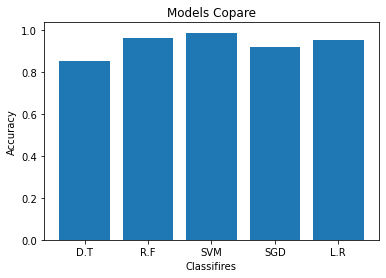

In [7]:
#  결과 데이터 
scores = [dt_score,rf_score,svm_score,sgd_score,lr_score]
names = ['D.T','R.F','SVM','SGD','L.R']

# 그래프 그리기
plt.bar(names,scores)

# 라벨, 타이틀 달기
plt.xlabel('Classifires')
plt.ylabel('Accuracy')
plt.title("Models Copare")

## ✍ 회고 
- 5개의 분류기를 통해 손글씨 데이터를 학습하여 각 분류기들의 성능을 평가 및 비교 해보았다.